# **Toxic Comment Detection**

---



**Data1: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data **


---


**Data2: https://www.kaggle.com/c/quora-insincere-questions-classification/data**



**Import all the required packages and esablish connecion with Google Drive**




In [0]:
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.metrics import accuracy_score
from google.colab import drive
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Import data from CSV**

In [0]:
!cp gdrive/My\ Drive/ALDA\ Capstone/train_jigsaw.csv .
!ls
df = pd.read_csv("train_jigsaw.csv")
df = df.dropna()
df.head()

cleaned_text.pkl		    gdrive
d2v.model			    sample_data
d2v.model.docvecs.vectors_docs.npy  sequential.pkl
d2v.model.trainables.syn1neg.npy    train_jigsaw.csv
d2v.model.wv.vectors.npy


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


**Update Toxicity**

In [0]:
df['Toxicity'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']

df.tail(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Toxicity
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,0


In [0]:
df.loc[df.Toxicity > 0, ['Toxicity']] = 1
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Toxicity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


**Drop unwanted columns**

In [0]:
datadf = df[['comment_text','Toxicity']]
#datadf = datadf.head(100)                            #333333333333333
datadf.head()

,comment_text,Toxicity
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [0]:
!cp gdrive/My\ Drive/ALDA\ Capstone/train.csv .
df_quora = pd.read_csv("train.csv")
df_quora = df_quora[['question_text', 'target']]
df_quora = df_quora.rename(columns={"question_text": "comment_text", "target": "Toxicity"})
df_quora.head()

,comment_text,Toxicity
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0


In [0]:
print(len(datadf))
print(len(df_quora))
datadf = pd.concat([datadf, df_quora], ignore_index=True, sort=False)
datadf = datadf.dropna()
print(len(datadf))

159571
1306122
1465693


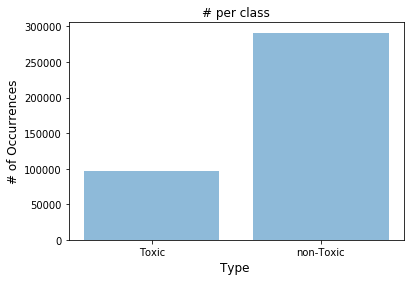

Toxic Content-> 97035
Non-Toxic Content-> 291105


In [0]:
import matplotlib.pyplot as plt

#data exploration
toxic = datadf[datadf.Toxicity ==  1]
nontoxic = datadf[datadf.Toxicity ==  0]

nontoxic = nontoxic.head(len(toxic)*3)


objects = ('Toxic', 'non-Toxic')
y_pos = np.arange(len(objects))
count = [len(toxic),len(nontoxic)]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Type ', fontsize=12)
plt.ylabel('# of Occurrences', fontsize=12)
plt.title("# per class")
plt.show()

print('Toxic Content->',len(toxic))
print('Non-Toxic Content->',len(nontoxic))


**DATA PRE-PROCESSING:**

*   Stop words removal
*   Stemming
*   Cleaning
*   Appos handling
*   Tokenization



In [0]:
import nltk
import string
import json
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
!cp gdrive/My\ Drive/ALDA\ Capstone/appos.txt .
lem = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop_words = stopwords.words('english')
ps = PorterStemmer()
appos_words = {}
all_words = []

with open('appos.txt') as json_file:  
    appos_words = json.load(json_file)

def processText(text):
    
    #convert to lower case
    
    text = text.lower()
    
    #handle negation 
    
    words = text.split()
    text = [appos_words[word] if word in appos_words else word for word in words]
    text = " ".join(text)
    
    #tokenize words
    words = nltk.word_tokenize(text)
    
    #remove stop words
    words  = [i for i in words if i not in stop_words]
    
    
    #Lemmatization
    words = [lem.lemmatize(word,"v") for word in words]
    #stem words
    #words = stemSentence(words)

    
    #remove standalone punctuations
    words = [word for word in words if word.isalpha()]
    
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in words]
    
    all_words.extend(words)
    
    return words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
datadf['Processed_text'] = datadf.comment_text.apply(processText)

datadf.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment_text,Toxicity,Processed_text
0,Explanation\nWhy the edits made under my usern...,0,"[explanation, edit, make, username, hardcore, ..."
1,D'aww! He matches this background colour I'm s...,0,"[match, background, colour, I, seemingly, stic..."
2,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, I, really, try, edit, war, guy, con..."
3,"""\nMore\nI can't make any real suggestions on ...",0,"[make, real, suggestions, improvement, wonder,..."
4,"You, sir, are my hero. Any chance you remember...",0,"[sir, hero, chance, remember, page]"


**Save processed data**

In [0]:
file_name = 'cleaned_text.pkl'
datadf.to_pickle(file_name)
!cp ./cleaned_text.pkl gdrive/My\ Drive/ALDA\ Capstone/
model_dict = {}

In [0]:
!cp gdrive/My\ Drive/ALDA\ Capstone/cleaned_text.pkl .
file_name = 'cleaned_text.pkl'
datadf = pd.read_pickle(file_name)
model_dict = {}


In [0]:
datadf.head()


#most frequent words
fdist = FreqDist(all_words)
fdist.plot(30,cumulative=False)
plt.show()

**Create word cloud of toxic and non-toxic separately**

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
!cp gdrive/My\ Drive/ALDA\ Capstone/backimage.jpg .
mask = np.array(Image.open("backimage.jpg"))
mask = mask[:,:,1]

#check frequent words for non - toxic comments in original sentence
subset = datadf[datadf.Toxicity ==  0]
text = subset.comment_text.values
temp = []
for words in text:
  temp.append(str(words))
  
text = str(temp)
wc = WordCloud(background_color="black",max_words=5000,mask=mask)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Non Toxic Comments before processing", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=200), alpha=0.98)
plt.show()


#check frequent words for toxic comments
subset = datadf[datadf.Toxicity ==  1]
text = subset.comment_text.values
temp = []
for words in text:
  temp.append(str(words))
  
text = str(temp)
wc = WordCloud(background_color="black",max_words=5000,mask=mask)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Toxic Comments before processing", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=2534), alpha=0.98)
plt.show()


#check frequent words for non - toxic comments
subset = datadf[datadf.Toxicity ==  0]
text = subset.Processed_text.values
temp = []
for words in text:
  temp.append(str(words))
  
text = str(temp)
wc = WordCloud(background_color="black",max_words=5000,mask=mask)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Non Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=200), alpha=0.98)
plt.show()

#check frequent words for toxic comments
subset = datadf[datadf.Toxicity ==  1]
text = subset.Processed_text.values
temp = []
for words in text:
  temp.append(str(words))
  
text = str(temp)
wc = WordCloud(background_color="black",max_words=5000,mask=mask)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=2534), alpha=0.98)
plt.show()

**Split data into Training dataset and Test dataset separately**

In [0]:
from sklearn.model_selection import train_test_split
y = datadf['Toxicity']
x = datadf['Processed_text']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

train_count = y_train.value_counts()
test_count = y_test.value_counts()

print('Number of Toxic articles in Training set -> ', train_count[0])
print('Number of Non Toxic articles in Training set -> ', train_count[1])
print('Number of Toxic articles in Testing set -> ', test_count[0])
print('Number of Non Toxic articles in Testing set -> ', test_count[1])

Number of Toxic articles in Training set ->  114676
Number of Non Toxic articles in Training set ->  12980
Number of Toxic articles in Testing set ->  28670
Number of Non Toxic articles in Testing set ->  3245


**Build and save Doc2Vec model**

In [0]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#import multiprocessing
#cores = multiprocessing.cpu_count()

tagged_data = [TaggedDocument(
    words = _d, 
    tags = [str(i)]) for i, _d in enumerate(x_train)]

max_epochs = 30
vec_size = 300
alpha = 0.025

model = Doc2Vec(
    vector_size = vec_size,
    min_count = 10,
    window = 10,
    workers = 5,
    dm = 1)

model.build_vocab(tagged_data)
print('Training Doc2Vec Model')

for epoch in range(max_epochs):

    print('Training iteration {0}'.format(epoch + 1))
    
    model.train(tagged_data,
                total_examples = model.corpus_count,
                epochs = model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
model_dict['doc2vec'] = model
print("Model Saved")
!cp ./d2v.model gdrive/My\ Drive/ALDA\ Capstone/
!cp ./d2v.model.docvecs.vectors_docs.npy gdrive/My\ Drive/ALDA\ Capstone/
!cp ./d2v.model.trainables.syn1neg.npy  gdrive/My\ Drive/ALDA\ Capstone/
!cp ./d2v.model.wv.vectors.npy  gdrive/My\ Drive/ALDA\ Capstone/

Training Doc2Vec Model
Training iteration 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


Training iteration 2
Training iteration 3
Training iteration 4
Training iteration 5
Training iteration 6
Training iteration 7
Training iteration 8
Training iteration 9
Training iteration 10
Training iteration 11
Training iteration 12
Training iteration 13
Training iteration 14
Training iteration 15
Training iteration 16
Training iteration 17
Training iteration 18
Training iteration 19
Training iteration 20
Training iteration 21
Training iteration 22
Training iteration 23
Training iteration 24
Training iteration 25
Training iteration 26
Training iteration 27
Training iteration 28
Training iteration 29
Training iteration 30
Model Saved


**Use Doc2Vec model to create Doc2Vec embeddings for train and test data**

In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
!cp gdrive/My\ Drive/ALDA\ Capstone/d2v.model .
!cp gdrive/My\ Drive/ALDA\ Capstone/d2v.model.docvecs.vectors_docs.npy .
!cp gdrive/My\ Drive/ALDA\ Capstone/d2v.model.trainables.syn1neg.npy .
!cp gdrive/My\ Drive/ALDA\ Capstone/d2v.model.wv.vectors.npy .
model = Doc2Vec.load("d2v.model")

#print(type(x_test))
test_data = []
for i in range(x_test.shape[0]):
    temp = np.concatenate([model.infer_vector(x_test.iloc[i])])
    test_data.append(temp)

train_data = []

for i in range(x_train.shape[0]):
    temp = model.docvecs[i]
    train_data.append(temp)
    

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


**Decision Tree Classifier**

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 22, min_samples_leaf=1)
dt_clf.fit(train_data, y_train)

dt_y_pred_train = dt_clf.predict(train_data)
dt_y_pred_test = dt_clf.predict(test_data)

train_accuracy = accuracy_score(y_train, dt_y_pred_train)
test_accuracy = accuracy_score(y_test, dt_y_pred_test)

dTree_filename = 'dTree.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(dTree_filename, 'wb')
pickle.dump(dt_clf, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()
model_dict['dTree'] = dt_clf
print("Model Saved")

print('Train Accuracy -> ', train_accuracy*100)
print('Test Accuracy -> ', test_accuracy*100)

Model Saved
Train Accuracy ->  99.5017860500094
Test Accuracy ->  82.53172489425036


**Decision Tree Classifier - hyper parameter tuning**

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc , recall_score

max_depths = [15,20,23,25,27,30]
train_recalls = []
train_accuracy = []
test_recalls = []
test_accuracy = []
dtreemodels = {}
for max_depth in max_depths:
  print(max_depth)
  dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=max_depth, min_samples_leaf=1)
  dt_clf.fit(train_data, y_train)
  
  dt_y_pred_train = dt_clf.predict(train_data)
  dt_y_pred_test = dt_clf.predict(test_data)

  train_accuracy.append(accuracy_score(y_train, dt_y_pred_train))
  test_accuracy.append(accuracy_score(y_test, dt_y_pred_test))
  train_recalls.append(recall_score(y_train, dt_y_pred_train))
  test_recalls.append(recall_score(y_test, dt_y_pred_test))
  dtreemodels[max_depth] = dt_clf


15
20
23
25
27
30


**Decision Tree Classifier -  plot the parameter graph for train and test recall **

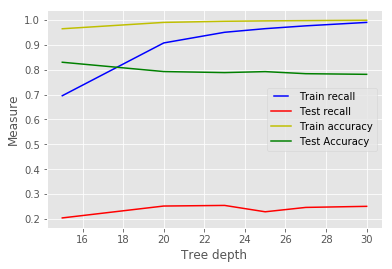

In [0]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_recalls, 'b', label="Train recall")
line2, = plt.plot(max_depths, test_recalls, 'r', label="Test recall")
line3, = plt.plot(max_depths, train_accuracy, 'y', label="Train accuracy")
line4, = plt.plot(max_depths, test_accuracy, 'g', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Measure')
plt.xlabel('Tree depth')
plt.show()

In [0]:
model_dict = {}
model_dict['dtree'] = dtreemodels[20]
dt_clf = dtreemodels[20]

**Gaussian Naive Bayes Classifier**

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(train_data, y_train)

nb_y_pred_train = nb.predict(train_data)
nb_y_pred_test = nb.predict(test_data)

train_accuracy = accuracy_score(y_train, nb_y_pred_train)
test_accuracy = accuracy_score(y_test, nb_y_pred_test)

nb_filename = 'nb.pkl'
nb_model_pkl = open(nb_filename, 'wb')
pickle.dump(nb, nb_model_pkl)
nb_model_pkl.close()
model_dict['nb'] = nb
print("Model Saved")

print('Train Accuracy -> ', train_accuracy*100)
print('Test Accuracy -> ', test_accuracy*100)

Model Saved
Train Accuracy ->  47.57551544776587
Test Accuracy ->  10.145699514334952


**Logistic Regression Classifier**

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='sag', multi_class='auto').fit(train_data, y_train)

lr_y_pred_train = lr.predict(train_data)
lr_y_pred_test = lr.predict(test_data)

lr_filename = 'lr.pkl'
lr_model_pkl = open(lr_filename, 'wb')
pickle.dump(lr, lr_model_pkl)
lr_model_pkl.close()
model_dict['lr'] = lr
print("Model Saved")

train_accuracy = accuracy_score(y_train, lr_y_pred_train)
test_accuracy = accuracy_score(y_test, lr_y_pred_test)

print('Train Accuracy -> ', train_accuracy*100)
print('Test Accuracy -> ', test_accuracy*100)

Model Saved
Train Accuracy ->  92.80253180422385
Test Accuracy ->  90.7065643114523


**Logistic Regression Classifier -  Paramter Tuning** 

In [0]:
C_param_range = [0.01,0.1,1,10,100]
test_accuracys = []
test_recalls = []
train_accuracys = []
train_recalls = []
lr_models = {}
for i in C_param_range:
  print(i)
  lr = LogisticRegression(random_state=0, solver='sag', multi_class='auto',C=i).fit(train_data, y_train)
  lr_y_pred_train = lr.predict(train_data)
  lr_y_pred_test = lr.predict(test_data)
  test_accuracys.append(accuracy_score(y_test, lr_y_pred_test))
  test_recalls.append(recall_score(y_test, lr_y_pred_test))
  train_accuracys.append(accuracy_score(y_train, lr_y_pred_train))
  train_recalls.append(recall_score(y_train, lr_y_pred_train))
  lr_models[i] = lr

0.01
0.1
1
10
100


**Logistic Regression Classifier -  plot the parameter graph for test accuracy and test recall **

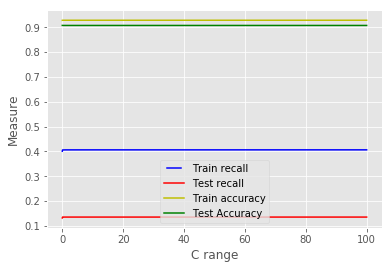

In [0]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(C_param_range, train_recalls, 'b', label="Train recall")
line2, = plt.plot(C_param_range, test_recalls, 'r', label="Test recall")
line3, = plt.plot(C_param_range, train_accuracys, 'y', label="Train accuracy")
line4, = plt.plot(C_param_range, test_accuracys, 'g', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Measure')
plt.xlabel('C range')
plt.show()

In [0]:
model_dict = {}
model_dict['lr'] = lr_models[10]
lr = lr_models[10]

**Simple Ensemble Model - Voting Classifier**

In [0]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lr', lr), ('dt', dt_clf), ('nb', nb)], voting='hard')
model.fit(train_data,y_train)

ensemble_voting_pred_train = model.predict(train_data)
ensemble_voting_y_pred_test = model.predict(test_data)

ensemble_vote_filename = 'ensemble_vote.pkl'
ensemble_vote_model_pkl = open(ensemble_vote_filename, 'wb')
pickle.dump(model, ensemble_vote_model_pkl)
ensemble_vote_model_pkl.close()
model_dict['ensemble_vote'] = model
print("Model Saved")

train_accuracy = accuracy_score(y_train, ensemble_voting_pred_train)
test_accuracy = accuracy_score(y_test, ensemble_voting_y_pred_test)

print('Train Accuracy -> {}'.format(train_accuracy*100))
print('Test Accuracy -> {}'.format(test_accuracy*100))

Model Saved
Train Accuracy -> 98.50770821583005
Test Accuracy -> 78.19520601597995


**Simple Ensemble Models - Average and Weighted Average Classifiers**

In [0]:
average_ensemble_pred_test = (dt_y_pred_test+lr_y_pred_test + nb_y_pred_test)/3
average_ensemble_pred_test = average_ensemble_pred_test.astype(int)
test_accuracy_average = accuracy_score(y_test, average_ensemble_pred_test)


weighted_average_ensemble_pred_test = (dt_y_pred_test*0.25+lr_y_pred_test*0.5+nb_y_pred_test*0.25)
weighted_average_ensemble_pred_test = weighted_average_ensemble_pred_test.astype(int)
test_accuracy_weighted = accuracy_score(y_test, weighted_average_ensemble_pred_test)

print('Average Ensemble Test Accuracy -> {}'.format(test_accuracy_average*100))
print('Weighted Average Ensemble Test Accuracy -> {}'.format(test_accuracy_weighted*100))

**DNN Classifier**

In [0]:
from keras.models import Sequential
from keras import layers
from keras import backend as K
import tensorflow as tf

K.clear_session()
tf.reset_default_graph()
input_dim   = len(train_data[0])
model = Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
history = model.fit(np.array(train_data), y_train,
                    epochs=140,
                    verbose=True,
                    validation_split=0.20,
                    batch_size=64)

sequential_filename = 'sequential.pkl'
sequential_model_pkl = open(sequential_filename, 'wb')
pickle.dump(model, sequential_model_pkl)
sequential_model_pkl.close()
model_dict['sequential'] = model
print("Model Saved")

!cp ./sequential.pkl gdrive/My\ Drive/ALDA\ Capstone/

test_loss, test_accuracy = model.evaluate(np.array(test_data), y_test, verbose=True)
print("Test Accuracy: {:.4f}".format(test_accuracy))
train_loss, train_accuracy = model.evaluate(np.array(train_data), y_train, verbose=True)
print("Train Accuracy: {:.4f}".format(train_accuracy))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31,121
Trainable params: 31,121
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 102124 samples, validate on 25532 samples
Epoch 1/140
102124/102124 [==============================] - 8s 79us/step - loss: 0.0537 - acc: 0.9337 - val_loss: 0.0517 - val_acc: 0.9373
Epoch 2/140
102124/102124 [==============================] - 5s 47us/step - loss: 0.0443 - acc: 0.9452 - val_loss: 0.0497 - val_acc: 0.9380
Epoch 3/140
102124/1021

**DNN Classifier - plot history of training the Dnn model**

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

**DNN Classifier - Paramter Tuning**

In [0]:

from keras.models import Sequential
from keras import layers
from sklearn.metrics import accuracy_score
from sklearn import metrics
from keras import backend as K
import tensorflow as tf

epoch_sizes = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

test_recalls = []
test_accuracys = []
test_conf_matrix = []
dnn_models = {}
def get_recall(model,epoch):
  y_pred_test = model.predict(np.array(test_data))
  y_pred = []
  for x in y_pred_test:
    if x[0] > 0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  y_pred_test = pd.Series(y_pred)
  cm=metrics.confusion_matrix(y_test, y_pred_test)
  test_conf_matrix.append(cm)
  dnn_models[epo] = model
  recall_confusion_model = (cm[1][1])/(cm[1][0]+cm[1][1])
  accuracy_confusion_model = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
  return recall_confusion_model , accuracy_confusion_model

for epo in epoch_sizes:
  input_dim   = len(train_data[0])
  model = Sequential()
  model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(loss='mse', 
                optimizer='adam', 
                metrics=['accuracy'])
  model.fit(np.array(train_data), y_train,
                      epochs=epo,
                      verbose=True,
                      validation_split=0.20,
                      batch_size=64)
  recall , accuracy = get_recall(model,epo)
  test_recalls.append(recall)
  test_accuracys.append(accuracy)
  K.clear_session()
  tf.reset_default_graph()



Train on 102124 samples, validate on 25532 samples
Epoch 1/10
102124/102124 [==============================] - 6s 56us/step - loss: 0.0556 - acc: 0.9303 - val_loss: 0.0513 - val_acc: 0.9367
Epoch 2/10
102124/102124 [==============================] - 5s 53us/step - loss: 0.0447 - acc: 0.9448 - val_loss: 0.0496 - val_acc: 0.9389
Epoch 3/10
102124/102124 [==============================] - 5s 48us/step - loss: 0.0398 - acc: 0.9511 - val_loss: 0.0499 - val_acc: 0.9378
Epoch 4/10
102124/102124 [==============================] - 5s 47us/step - loss: 0.0358 - acc: 0.9569 - val_loss: 0.0503 - val_acc: 0.9384
Epoch 5/10
102124/102124 [==============================] - 5s 47us/step - loss: 0.0323 - acc: 0.9620 - val_loss: 0.0499 - val_acc: 0.9396
Epoch 6/10
102124/102124 [==============================] - 5s 47us/step - loss: 0.0295 - acc: 0.9658 - val_loss: 0.0511 - val_acc: 0.9393
Epoch 7/10
102124/102124 [==============================] - 5s 47us/step - loss: 0.0274 - acc: 0.9686 - val_loss: 0

In [0]:
test_conf_matrix

[array([[28177,   493],
        [ 1940,  1305]]), array([[27716,   954],
        [ 1786,  1459]]), array([[27508,  1162],
        [ 1609,  1636]]), array([[27265,  1405],
        [ 1610,  1635]]), array([[27357,  1313],
        [ 1628,  1617]]), array([[27083,  1587],
        [ 1570,  1675]]), array([[26851,  1819],
        [ 1567,  1678]]), array([[27213,  1457],
        [ 1566,  1679]]), array([[27564,  1106],
        [ 1672,  1573]]), array([[26743,  1927],
        [ 1497,  1748]]), array([[26309,  2361],
        [ 1472,  1773]]), array([[26664,  2006],
        [ 1522,  1723]]), array([[26925,  1745],
        [ 1545,  1700]]), array([[25301,  3369],
        [ 1339,  1906]]), array([[27176,  1494],
        [ 1617,  1628]])]

**DNN Classifier - plot Tuning paramter vs recall **

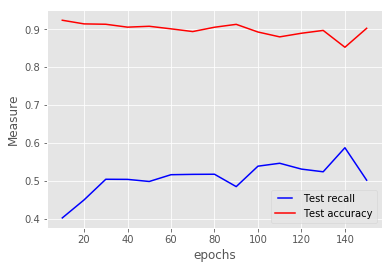

In [0]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(epoch_sizes, test_recalls, 'b', label="Test recall")
line2, = plt.plot(epoch_sizes, test_accuracys, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Measure')
plt.xlabel('epochs')
plt.show()

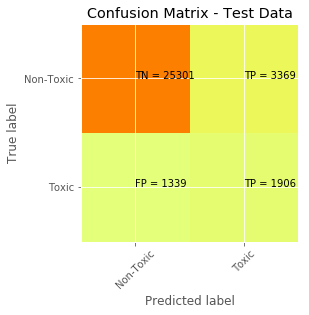

In [0]:
cm =  test_conf_matrix[13]
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non-Toxic','Toxic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','TP'], ['FP', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

**Complex Ensemble Model - AdaBoost Classifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=5, n_estimators=25, learning_rate=1)

model.fit(train_data, y_train)
y_pred = model.predict(test_data)

adaboost_filename = 'adaboost.pkl'
adaboost_model_pkl = open(adaboost_filename, 'wb')
pickle.dump(model, adaboost_model_pkl)
adaboost_model_pkl.close()
model_dict['adaboost'] = model
print("Model Saved")

print("Accuracy:", accuracy_score(y_test, y_pred))
model.score(test_data,y_test)

**Complex Ensemble Model - Random Forest Classifier**

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=1, n_estimators=25)

randForest_filename = 'randForest.pkl'
randForest_model_pkl = open(randForest_filename, 'wb')
pickle.dump(model, randForest_model_pkl)
randForest_model_pkl.close()
model_dict['randForest'] = model
print("Model Saved")

model.fit(train_data, y_train)
y_pred = model.predict(test_data)
print("Accuracy:",accuracy_score(y_test, y_pred))
model.score(test_data,y_test)

**Generate ROC Curve/ Confusion Matrix for all the models other than DNN**

Predicted      0    1    All
True                        
0          28510  160  28670
1           2806  439   3245
All        31316  599  31915


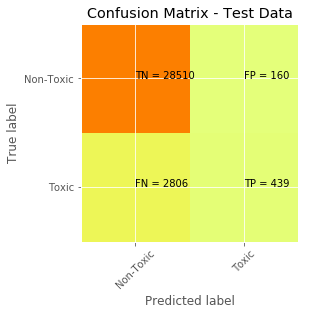

lr
accuracy is -> 0.907065643114523
precision is -> 0.7328881469115192
recall is -> 0.1352850539291217
f_measure is -> 0.22840790842872005
Predicted      0     1    All
True                         
0          23869  4801  28670
1           2158  1087   3245
All        26027  5888  31915


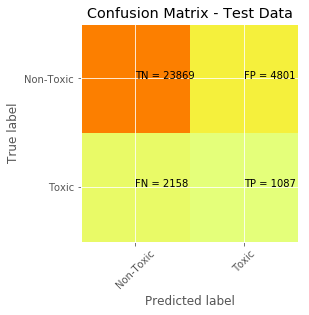

ensemble_vote
accuracy is -> 0.7819520601597995
precision is -> 0.18461277173913043
recall is -> 0.3349768875192604
f_measure is -> 0.23803788459432826


In [0]:
import sklearn.metrics as metrics

# Generate ROC curve for all the models

for model_name, model in model_dict.items(): 
  # calculate the fpr and tpr for all thresholds of the classification
  if model_name == 'doc2vec':
    continue
  elif model_name == 'sequential':
    continue
    y_pred_test = model.predict(np.array(test_data))
  else:
    y_pred_test = model.predict(test_data)
    
  cm=metrics.confusion_matrix(y_test, y_pred_test)
  #print(cm)
  print(pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Non-Toxic','Toxic']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  
  
  plt.show()
  print(model_name)
  accuracy_confusion_model = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
  precision_confusion_model = (cm[1][1])/(cm[0][1]+cm[1][1])
  recall_confusion_model = (cm[1][1])/(cm[1][0]+cm[1][1])
  f_measure_confusion_model = 2*(precision_confusion_model*recall_confusion_model)/(precision_confusion_model+recall_confusion_model)

  print("accuracy is -> " + str(accuracy_confusion_model))
  print("precision is -> " + str(precision_confusion_model))
  print("recall is -> " + str(recall_confusion_model))
  print("f_measure is -> " + str(f_measure_confusion_model))

**Generate Confusion Matrix for  DNN**

[[0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 ...
 [3.9102087e-14]
 [5.5391797e-13]
 [1.3892348e-03]]


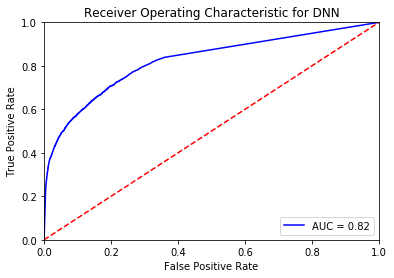

In [0]:



from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
!cp gdrive/My\ Drive/ALDA\ Capstone/sequential.pkl .
filename = 'sequential.pkl'
dt_clf = pickle.load(open(filename, 'rb'))
#dt_clf = dnn_models[140]

y_pred_test = dt_clf.predict(np.array(test_data))
#print(type(y_test))

y_pred = []
for x in y_pred_test:
#   if x[0] > 0.5:
#     y_pred.append(1)
#   else:
#     y_pred.append(0)
  y_pred.append(x)
    
y_pred_test = pd.Series(y_pred)

# cm=metrics.confusion_matrix(y_test, y_pred_test)

# plt.clf()
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
# classNames = ['Negative','Positive']
# plt.title('Confusion Matrix - Test Data')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# tick_marks = np.arange(len(classNames))
# plt.xticks(tick_marks, classNames, rotation=45)
# plt.yticks(tick_marks, classNames)
# s = [['TN','TP'], ['FP', 'TP']]
# for i in range(2):
#     for j in range(2):
#         plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
# plt.show()

# accuracy_confusion_model = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
# precision_confusion_model = (cm[1][1])/(cm[0][1]+cm[1][1])
# recall_confusion_model = (cm[1][1])/(cm[1][0]+cm[1][1])
# f_measure_confusion_model = 2*(precision_confusion_model*recall_confusion_model)/(precision_confusion_model+recall_confusion_model)

# print("accuracy is -> " + str(accuracy_confusion_model))
# print("precision is -> " + str(precision_confusion_model))
# print("recall is -> " + str(recall_confusion_model))
# print("f_measure is -> " + str(f_measure_confusion_model))

probs = dt_clf.predict_proba(np.array(test_data))
#probs = model.predict_proba(y_test)

# preds = probs[:,1]
# print(preds)
print(probs)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for {}'.format('DNN'))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()